In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/captcha-data/data/val/ebcbx.png
/kaggle/input/captcha-data/data/val/g247w.png
/kaggle/input/captcha-data/data/val/x362g.png
/kaggle/input/captcha-data/data/val/c4bgd.png
/kaggle/input/captcha-data/data/val/m6n4x.png
/kaggle/input/captcha-data/data/val/7bwm2.png
/kaggle/input/captcha-data/data/val/5mgn4.png
/kaggle/input/captcha-data/data/val/44ype.png
/kaggle/input/captcha-data/data/val/g842c.png
/kaggle/input/captcha-data/data/val/pw5nc.png
/kaggle/input/captcha-data/data/val/ycmcw.png
/kaggle/input/captcha-data/data/val/5xwcg.png
/kaggle/input/captcha-data/data/val/dpbyd.png
/kaggle/input/captcha-data/data/val/fg38b.png
/kaggle/input/captcha-data/data/val/px8n8.png
/kaggle/input/captcha-data/data/val/nb267.png
/kaggle/input/captcha-data/data/val/yg5bb.png
/kaggle/input/captcha-data/data/val/5nm6d.png
/kaggle/input/captcha-data/data/val/d2nbn.png
/kaggle/input/captcha-data/data/val/8d2nd.png
/kaggle/input/captcha-data/data/val/dbfen.png
/kaggle/input/captcha-data/data/va

In [2]:
#Common
import os
import tensorflow as tf
from tensorflow import keras
import cv2
import matplotlib as plt

#Data
from glob import glob
from tqdm import tqdm
from tensorflow import io
import tensorflow.data as tfd

#Data Visualization
import matplotlib.pyplot as plt

#Model
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
#Train data
lst_train = []
for i in os.listdir("/kaggle/input/captcha-data/data/train"):
    path = "/kaggle/input/captcha-data/data/train/" + i
    arr = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    lst_train.append(arr)
X_train = np.array(lst_train)
X_train = X_train / 255.0
X_train.shape

(856, 50, 200)

In [4]:
#Test data
lst_test = []
for i in os.listdir("/kaggle/input/captcha-data/data/val"):
    path = "/kaggle/input/captcha-data/data/val/" + i
    arr = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    lst_test.append(arr)
X_test = np.array(lst_test)
X_test = X_test / 255.0
X_test.shape

(214, 50, 200)

In [5]:
#Train data
labeled_lst_train = []
for i in os.listdir("/kaggle/input/captcha-data/data/train"):
    labeled_lst_train.append(i[:5])

In [6]:
#Test data
labeled_lst_test = []
for i in os.listdir("/kaggle/input/captcha-data/data/val"):
    labeled_lst_test.append(i[:5])

In [7]:
#One hot encoding for Train set
bank = "abcdefghijklmnopqrstuvwxyz0123456789"
images_train = np.zeros((856, 5, 36))
for i in range(len(labeled_lst_train)):
    for j in range(len(labeled_lst_train[i])):
        val = bank.find(labeled_lst_train[i][j])
        images_train[i][j][val] = 1

In [8]:
#One hot encoding for Test set
bank = "abcdefghijklmnopqrstuvwxyz0123456789"
images_test = np.zeros((214, 5, 36))
for i in range(len(labeled_lst_test)):
    for j in range(len(labeled_lst_test[i])):
        val = bank.find(labeled_lst_test[i][j])
        images_test[i][j][val] = 1

In [9]:
def label_to_string(title):
    index = np.argmax(title, axis = 1)
    label = ""
    for j in index:
        label = label + bank[j]
    return label

In [10]:
#Model

#CNN
input_img = tf.keras.Input(shape = (50,200,1))
l2_parameter = 0.050
L2 = tf.keras.regularizers.l2(l2_parameter)
Z1 = tf.keras.layers.Conv2D(filters = 20, kernel_size = (3, 3), strides = (1,1), padding = "SAME", activation = "relu", kernel_regularizer = L2)(input_img)
bn1 = layers.BatchNormalization()(Z1)
P1 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "SAME")(bn1)

Z2 = tf.keras.layers.Conv2D(filters = 20, kernel_size = (3, 3), strides = (1, 1), padding = "SAME", activation = "relu", kernel_regularizer = L2)(P1)
bn2 = layers.BatchNormalization()(Z2)
P2 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "SAME")(bn2)

Z3 = tf.keras.layers.Conv2D(filters = 40, kernel_size = (3, 3), strides = (1, 1), padding = "SAME", activation = "relu", kernel_regularizer = L2)(P2)
bn3 = layers.BatchNormalization()(Z3)
P3 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "SAME")(bn3)

Z4 = tf.keras.layers.Conv2D(filters = 60, kernel_size = (3, 3), strides = (1, 1), padding = "SAME", activation = "relu", kernel_regularizer = L2)(P3)
bn4 = layers.BatchNormalization()(Z4)
P4 = tf.keras.layers.MaxPooling2D(pool_size = (2, 2), padding = "SAME")(bn4)

F = tf.keras.layers.Flatten()(P4)
print(F.shape)
R = tf.keras.layers.Reshape((5, 624))(F)

#RNN
rnn1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(10, return_sequences = True, dropout = 0.20))(R)
rnn2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(12, return_sequences = True, dropout = 0.20))(rnn1)

dense2 = tf.keras.layers.Dense(units = 36, kernel_initializer = "he_normal")(rnn2)
y_pred = tf.keras.layers.Activation("sigmoid")(dense2)

model = tf.keras.Model(inputs = input_img, outputs = y_pred)
model.summary()


(None, 3120)
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 200, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 50, 200, 20)       200       
                                                                 
 batch_normalization (BatchN  (None, 50, 200, 20)      80        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 100, 20)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 25, 100, 20)       3620      
                                                                 
 batch_normalization_1 (Batc  (None, 25, 100, 20

In [11]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ["categorical_accuracy"])

In [12]:
history = model.fit(X_train, images_train, epochs = 100, validation_data = (X_test, images_test))

Epoch 1/100
27/27 [==============================] - 14s 259ms/step - loss: 6.8798 - categorical_accuracy: 0.0582 - val_loss: 5.7503 - val_categorical_accuracy: 0.0262
Epoch 2/100
27/27 [==============================] - 6s 206ms/step - loss: 4.6873 - categorical_accuracy: 0.0895 - val_loss: 4.5036 - val_categorical_accuracy: 0.0084
Epoch 3/100
27/27 [==============================] - 6s 207ms/step - loss: 3.7088 - categorical_accuracy: 0.1002 - val_loss: 4.0402 - val_categorical_accuracy: 0.0093
Epoch 4/100
27/27 [==============================] - 6s 207ms/step - loss: 3.2905 - categorical_accuracy: 0.1079 - val_loss: 3.8690 - val_categorical_accuracy: 0.0084
Epoch 5/100
27/27 [==============================] - 5s 202ms/step - loss: 3.0886 - categorical_accuracy: 0.1189 - val_loss: 3.7942 - val_categorical_accuracy: 0.0084
Epoch 6/100
27/27 [==============================] - 6s 210ms/step - loss: 2.9890 - categorical_accuracy: 0.1283 - val_loss: 3.7776 - val_categorical_accuracy: 0.00

In [13]:
new_dataframe = pd.DataFrame(history.history) 
new_dataframe

,loss,categorical_accuracy,val_loss,val_categorical_accuracy
0,6.879757,0.058178,5.750279,0.026168
1,4.687341,0.089486,4.503561,0.008411
2,3.708836,0.100234,4.040157,0.009346
3,3.290505,0.107944,3.869044,0.008411
4,3.088563,0.118925,3.794240,0.008411
...,...,...,...,...
95,0.409252,0.953505,0.549071,0.918692
96,0.401325,0.957243,0.697089,0.877570
97,0.392745,0.958178,0.533339,0.922430
98,0.390713,0.958178,0.598269,0.910280


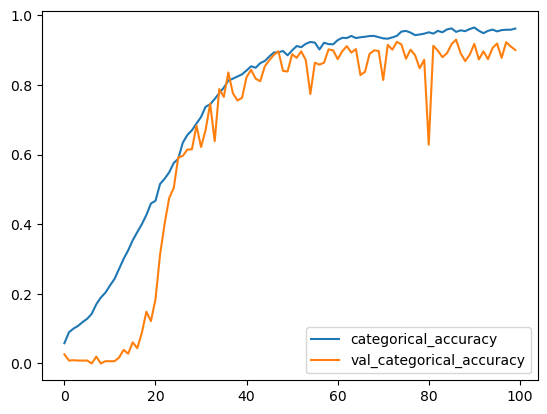

In [14]:
plt.plot(new_dataframe["categorical_accuracy"], label = "categorical_accuracy")
plt.plot(new_dataframe["val_categorical_accuracy"], label = "val_categorical_accuracy")
plt.legend()
plt.show()

In [15]:
q = np.random.randint(images_test.shape[0])
prediction = model.predict(X_test[q:q+1])
print(label_to_string(images_test[q]))
print(label_to_string(prediction.reshape(prediction.shape[1:])))

1/1 [==============================] - 1s 1s/step
pdcp4
ndcp4
